In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Cargamos el dataset anterior
dataset = pd.read_csv("df1_eda.csv")
dataset

idClient  Score CountryLocation  Gender  Age  Tenure  Games Balance  \
0            1    619          France       1   42       2           0.00   
1            2    608           Spain       1   41       1       83807.86   
2            3    502          France       1   42       8      159660.80   
3            4    699          France       1   39       1           0.00   
4            5    850           Spain       1   43       2      125510.82   
...        ...    ...             ...     ...  ...     ...            ...   
9995      9996    771          France       0   39       5           0.00   
9996      9997    516          France       0   35      10       57369.61   
9997      9998    709          France       1   36       7           0.00   
9998      9999    772         Germany       0   42       3       75075.31   
9999     10000    792          France       1   28       4      130142.79   

      NumOfProducts  HasPremiumAccess  IsActiveMember  Cumulative score  \
0                 1                 1               1         101348.88   
1                 1                 0               1         112542.58   
2                 3                 1               0         113931.57   
3                 2                 0               0          93826.63   
4                 1                 1               1          79084.10   
...             ...               ...             ...               ...   
9995              2                 1               0          96270.64   
9996              1                 1               1         101699.77   
9997              1                 0               1          42085.58   
9998              2                 1               0          92888.52   
9999              1                 1               0          38190.78   

      Churn ScoreGroup     AgeGroup GamesBalanceGroup CumScoreGroup  
0         1       GOLD  Young Adult               LOW        Expert  
1         0       GOLD  Young Adult            MEDIUM        Expert  
2         1     SILVER  Young Adult      INTERMEDIATE        Expert  
3         0       GOLD  Young Adult               LOW  Intermediate  
4         0   PLATINUM  Young Adult      INTERMEDIATE  Intermediate  
...     ...        ...          ...               ...           ...  
9995      0   PLATINUM  Young Adult               LOW  Intermediate  
9996      0     SILVER      Student               LOW        Expert  
9997      1       GOLD  Young Adult               LOW        Rookie  
9998      1   PLATINUM  Young Adult            MEDIUM  Intermediate  
9999      0   PLATINUM      Student      INTERMEDIATE        Rookie  

[10000 rows x 16 columns]

## Procesado
https://scikit-learn.org/stable/modules/preprocessing.html

In [4]:
# Seleccionamos las variables numéricas
num_features = dataset.select_dtypes(include=[np.number])
num_features.dtypes

idClient              int64
Score                 int64
Gender                int64
Age                   int64
Tenure                int64
Games Balance       float64
NumOfProducts         int64
HasPremiumAccess      int64
IsActiveMember        int64
Cumulative score    float64
Churn                 int64
dtype: object

In [5]:
from sklearn import preprocessing

In [8]:
columnasX = ['Score', 'Age','Tenure',
           'Games Balance','NumOfProducts',
           'Cumulative score']

In [9]:
# Data normalization
normalized_X = preprocessing.normalize(dataset[columnasX])
normalized_X

array([[6.10750116e-03, 4.14402340e-04, 1.97334448e-05, 0.00000000e+00,
        9.86672238e-06, 9.99981263e-01],
       [4.33292479e-03, 2.92187362e-04, 7.12652104e-06, 5.97258477e-01,
        7.12652104e-06, 8.02037064e-01],
       [2.55935218e-03, 2.14129067e-04, 4.07864889e-05, 8.14000431e-01,
        1.52949333e-05, 5.80858589e-01],
       ...,
       [1.68442289e-02, 8.55278194e-04, 1.66304093e-04, 0.00000000e+00,
        2.37577276e-05, 9.99857746e-01],
       [6.46366317e-03, 3.51650069e-04, 2.51178621e-05, 6.28577094e-01,
        1.67452414e-05, 7.77720344e-01],
       [5.83928708e-03, 2.06439442e-04, 2.94913489e-05, 9.59521607e-01,
        7.37283723e-06, 2.81574404e-01]])

In [10]:
# Data Standardization
standarization_X = preprocessing.scale(dataset[columnasX])
standarization_X

array([[-0.32622142,  0.29351742, -1.04175968, -1.22584767, -0.91158349,
         0.02188649],
       [-0.44003595,  0.19816383, -1.38753759,  0.11735002, -0.91158349,
         0.21653375],
       [-1.53679418,  0.29351742,  1.03290776,  1.33305335,  2.52705662,
         0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, -1.22584767, -0.91158349,
        -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, -0.02260751,  0.80773656,
        -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386,  0.85996499, -0.91158349,
        -1.07636976]])

In [13]:
for stand in columnasX:
    dataset[stand] = preprocessing.scale(dataset[stand], axis=0,
                       with_mean=True,
                       with_std=True)

In [14]:
dataset.head(10)

idClient     Score CountryLocation  Gender       Age    Tenure  \
0         1 -0.326221          France       1  0.293517 -1.041760   
1         2 -0.440036           Spain       1  0.198164 -1.387538   
2         3 -1.536794          France       1  0.293517  1.032908   
3         4  0.501521          France       1  0.007457 -1.387538   
4         5  2.063884           Spain       1  0.388871 -1.041760   
5         6 -0.057205           Spain       0  0.484225  1.032908   
6         7  1.774174          France       0  1.056346  0.687130   
7         8 -2.840488         Germany       1 -0.946079 -0.350204   
8         9 -1.547141          France       0  0.484225 -0.350204   
9        10  0.346319          France       0 -1.136786 -1.041760   

   Games Balance  NumOfProducts  HasPremiumAccess  IsActiveMember  \
0      -1.225848      -0.911583                 1               1   
1       0.117350      -0.911583                 0               1   
2       1.333053       2.527057                 1               0   
3      -1.225848       0.807737                 0               0   
4       0.785728      -0.911583                 1               1   
5       0.597329       0.807737                 1               0   
6      -1.225848       0.807737                 1               1   
7       0.618019       4.246377                 1               0   
8       1.050820       0.807737                 0               1   
9       0.931463      -0.911583                 1               1   

   Cumulative score  Churn ScoreGroup     AgeGroup GamesBalanceGroup  \
0          0.021886      1       GOLD  Young Adult               LOW   
1          0.216534      0       GOLD  Young Adult            MEDIUM   
2          0.240687      1     SILVER  Young Adult      INTERMEDIATE   
3         -0.108918      0       GOLD  Young Adult               LOW   
4         -0.365276      0   PLATINUM  Young Adult      INTERMEDIATE   
5          0.863650      1       GOLD  Young Adult            MEDIUM   
6         -1.565487      0   PLATINUM        Adult               LOW   
7          0.334854      1     BRONCE      Student            MEDIUM   
8         -0.437329      0     SILVER  Young Adult      INTERMEDIATE   
9         -0.493230      0       GOLD      Student      INTERMEDIATE   

  CumScoreGroup  
0        Expert  
1        Expert  
2        Expert  
3  Intermediate  
4  Intermediate  
5   GrandMaster  
6   Entry-Level  
7        Expert  
8        Novice  
9        Novice

## Binarización

In [17]:
# Evaluamos las variables categoricas
cat_feature = dataset.dtypes == object

# Guardamos las variables categóricas en un array
cat_cols = dataset.columns[cat_feature].tolist()

# Binarizamos
dataset = pd.get_dummies(dataset, columns=cat_cols)

# Observaremos los resultados
dataset.head(10)

idClient     Score  Gender       Age    Tenure  Games Balance  \
0         1 -0.326221       1  0.293517 -1.041760      -1.225848   
1         2 -0.440036       1  0.198164 -1.387538       0.117350   
2         3 -1.536794       1  0.293517  1.032908       1.333053   
3         4  0.501521       1  0.007457 -1.387538      -1.225848   
4         5  2.063884       1  0.388871 -1.041760       0.785728   
5         6 -0.057205       0  0.484225  1.032908       0.597329   
6         7  1.774174       0  1.056346  0.687130      -1.225848   
7         8 -2.840488       1 -0.946079 -0.350204       0.618019   
8         9 -1.547141       0  0.484225 -0.350204       1.050820   
9        10  0.346319       0 -1.136786 -1.041760       0.931463   

   NumOfProducts  HasPremiumAccess  IsActiveMember  Cumulative score  ...  \
0      -0.911583                 1               1          0.021886  ...   
1      -0.911583                 0               1          0.216534  ...   
2       2.527057                 1               0          0.240687  ...   
3       0.807737                 0               0         -0.108918  ...   
4      -0.911583                 1               1         -0.365276  ...   
5       0.807737                 1               0          0.863650  ...   
6       0.807737                 1               1         -1.565487  ...   
7       4.246377                 1               0          0.334854  ...   
8       0.807737                 0               1         -0.437329  ...   
9      -0.911583                 1               1         -0.493230  ...   

   GamesBalanceGroup_LOW  GamesBalanceGroup_MEDIUM  CumScoreGroup_Commodoro  \
0                      1                         0                        0   
1                      0                         1                        0   
2                      0                         0                        0   
3                      1                         0                        0   
4                      0                         0                        0   
5                      0                         1                        0   
6                      1                         0                        0   
7                      0                         1                        0   
8                      0                         0                        0   
9                      0                         0                        0   

   CumScoreGroup_Entry-Level  CumScoreGroup_Expert  CumScoreGroup_GrandMaster  \
0                          0                     1                          0   
1                          0                     1                          0   
2                          0                     1                          0   
3                          0                     0                          0   
4                          0                     0                          0   
5                          0                     0                          1   
6                          1                     0                          0   
7                          0                     1                          0   
8                          0                     0                          0   
9                          0                     0                          0   

   CumScoreGroup_Intermediate  CumScoreGroup_Master  CumScoreGroup_Novice  \
0                           0                     0                     0   
1                           0                     0                     0   
2                           0                     0                     0   
3                           1                     0                     0   
4                           1                     0                     0   
5                           0                     0                     0   
6                           0                     0                     0   
7                           

In [ ]:
# Alternativa

#churn_categorical = dataset[cat_feature]
#churn_categorical = pd.concat([pd.get_dummies(churn_categorical[col], prefix=col) for col in churn_categorical], axis=1)
#churn_categorical.head()


In [18]:
dataset.columns

Index(['idClient', 'Score', 'Gender', 'Age', 'Tenure', 'Games Balance',
       'NumOfProducts', 'HasPremiumAccess', 'IsActiveMember',
       'Cumulative score', 'Churn', 'CountryLocation_France',
       'CountryLocation_Germany', 'CountryLocation_Spain', 'ScoreGroup_BRONCE',
       'ScoreGroup_GOLD', 'ScoreGroup_PLATINUM', 'ScoreGroup_SILVER',
       'AgeGroup_Adult', 'AgeGroup_Mid-Senior', 'AgeGroup_Senior',
       'AgeGroup_Student', 'AgeGroup_Teenager', 'AgeGroup_Young Adult',
       'GamesBalanceGroup_HIGH', 'GamesBalanceGroup_INTERMEDIATE',
       'GamesBalanceGroup_LOW', 'GamesBalanceGroup_MEDIUM',
       'CumScoreGroup_Commodoro', 'CumScoreGroup_Entry-Level',
       'CumScoreGroup_Expert', 'CumScoreGroup_GrandMaster',
       'CumScoreGroup_Intermediate', 'CumScoreGroup_Master',
       'CumScoreGroup_Novice', 'CumScoreGroup_Rookie'],
      dtype='object')

## Correlación

In [27]:
train_churn = dataset
# Columnas transformadas
col_T = ['Score','Age','Games Balance', 'Gender', 'CountryLocation_Germany']

In [28]:
X_train = train_churn[col_T]
Y_train = dataset['Churn']

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, 
                                                    test_size=0.20, random_state=42)

In [ ]:
model = LogisticRegression().fit(X_train, Y_train)
model

In [23]:
# Creación de un nuevo dataset

# Eliminamos las variables Ids
train_churn.drop(['idClient'], axis=1, inplace=True)
train_churn.drop(['Age'], axis=1, inplace=True)

KeyError: "['idClient'] not found in axis"

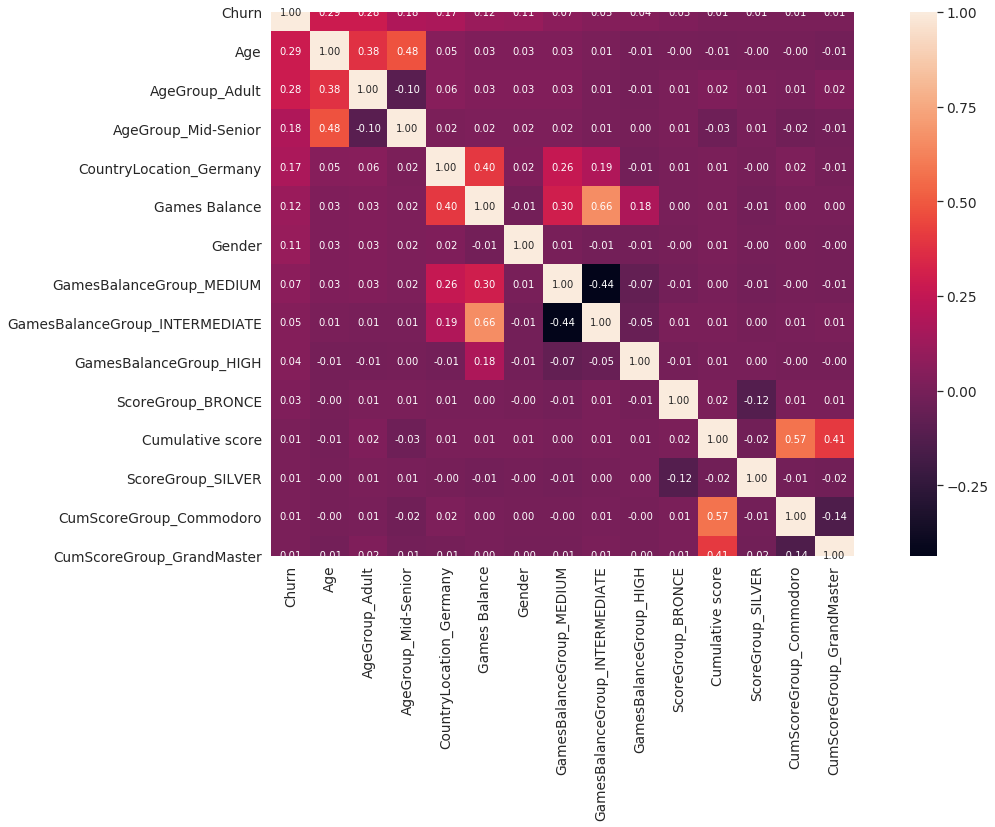

In [20]:
#churn correlation matrix
k = 15 #number of variables for heatmap
plt.figure(figsize=(20,10))
corrmat = train_churn.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'Churn')['Churn'].index
cm = np.corrcoef(train_churn[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()